In [28]:
import numpy as np
import pandas as pd

z-score 标准化

  零均值化 ：第一步.求每一列的平均值和标准差，第二步，该列上新数据=（原数据-均值）/标准差。

  python备注： DataFrame和Series之间的算术运算会将Series的索引匹配到DataFrame的列，然后沿着行一直向下运算（广播）。

In [31]:
def standardization(dataX):
###pca程序1 ，准备程序
# axis=0是列
    print('dataX',dataX)
    meanVal=dataX.mean(axis=0)
    print('meanVal',meanVal)
    ###我们的数据变量按列进行排列(即一行为一个样本),按列求均值，即求各个特征的均值
    #meanVal = np.mean(dataX, axis=0) ###此同为np的方法,得到Series
    stdVal=dataX.std(axis=0)
    print('stdVal',stdVal)
    datasTad =(dataX-meanVal)/stdVal
    print('datasTad',datasTad)
    return datasTad

1.3.1 求相关系数或者协方差矩阵

  PCA可以根据相关系数矩阵，也可以根据协方差矩阵进行计算。经标准化的样本数据的协方差矩阵就是原始样本数据的相关矩阵。

  python备注：DataFrame的corr和cov方法将以DataFrame 的形式反悔完整的相关系数或协方差矩阵。

In [16]:
# 查看axis=0是哪一个轴
A=np.array(np.random.randint(0,100,12))
arr=A.reshape(3,4)
print(np.concatenate([arr,arr],axis=0))
print(np.concatenate([arr,arr],axis=1))

[[42  0  3 20]
 [48  4 52  2]
 [85  0 47 50]
 [42  0  3 20]
 [48  4 52  2]
 [85  0 47 50]]
[[42  0  3 20 42  0  3 20]
 [48  4 52  2 48  4 52  2]
 [85  0 47 50 85  0 47 50]]


In [39]:
dataCov = datasTad.cov()
# dataCov = datasTad.cov()
print(dataCov)

          x1        x2        x3        x4
x1  1.000000  0.108722 -0.525174  0.098630
x2  0.108722  1.000000  0.066668 -0.407955
x3 -0.525174  0.066668  1.000000 -0.070582
x4  0.098630 -0.407955 -0.070582  1.000000


1.3.2 求特征值、特征矩阵

  python备注：numpy.linalg函数中的eig函数（参数类型为array），可以直接由covMat求得特征值和特征向量。

In [40]:
newData1 = np.array(dataCov)
eigenValue, eigenVector = np.linalg.eig(newData1)
print (eigenValue,eigenVector)

[ 0.40980729  0.63894509  1.56307481  1.38817281] [[-0.63919547  0.28166066 -0.63712248 -0.32583947]
 [ 0.40031312  0.5642625   0.20231652 -0.69312716]
 [-0.57637489  0.43158657  0.66093977  0.21138505]
 [ 0.31459584  0.64498693 -0.34103019  0.60722297]]


1.3.3 保留特征值比较大的前n个主成分

python备注： np.argsort函数返回的是数组值从小到大的索引值

In [54]:
sorceEigenValue = np.argsort(eigenValue)
print('sorceEigenValue',sorceEigenValue)
pcaEigenValue = eigenValue[sorceEigenValue]
print ('pcaEigenValue\n',pcaEigenValue)
sorceEigenVector = np.argsort(eigenVector)
print ('pcaEigenVector\n',sorceEigenVector)
print ('eigenVector\n',eigenVector)
pcaEigenVector = eigenVector[sorceEigenVector]
print ('eigenVector\n',eigenVector)

sorceEigenValue [0 1 3 2]
pcaEigenValue
 [ 0.40980729  0.63894509  1.38817281  1.56307481]
pcaEigenVector
 [[0 2 3 1]
 [3 2 0 1]
 [0 3 1 2]
 [2 0 3 1]]
eigenVector
 [[-0.63919547  0.28166066 -0.63712248 -0.32583947]
 [ 0.40031312  0.5642625   0.20231652 -0.69312716]
 [-0.57637489  0.43158657  0.66093977  0.21138505]
 [ 0.31459584  0.64498693 -0.34103019  0.60722297]]
eigenVector
 [[-0.63919547  0.28166066 -0.63712248 -0.32583947]
 [ 0.40031312  0.5642625   0.20231652 -0.69312716]
 [-0.57637489  0.43158657  0.66093977  0.21138505]
 [ 0.31459584  0.64498693 -0.34103019  0.60722297]]


1.3.4 将1.3.1-1.3.4步骤写入pca定义函数

给定要选取的主成份个数 n .

In [25]:
def pcan(dataX,datasTad,n):
#pca 程序2，主程序
    dataCov = datasTad.cov()
    newData1 = np.array(dataCov)
    eigenValue, eigenVector = np.linalg.eig(newData1)#求得特征值，特征向量
    sorceEigenValue = np.argsort(eigenValue)         #特征值下标从小到大的排列顺序
    nPcaEigenVector = sorceEigenValue[-n:]           #最大的n个特征值的下标
    pcaEigenVector = eigenVector[nPcaEigenVector]    #选取特征值对应的特征向量
    PCAX = np.dot(dataX , pcaEigenVector.T)          #得到降维后的数据
    return PCAX ,pcaEigenVector


# 对选取主成份的个数还可以另一种选法：根据解释原始信息的程度选取,给定累计解释率 a

def pcaPercentage(dataX,datasTad,percentage= 0.85):
#pca 程序2，主程序
    dataCov = datasTad.cov()
    newData1 = np.array(dataCov)
    eigenValue, eigenVector = np.linalg.eig(newData1)#求得特征值，特征向量
    sortEigenValue = np.argsort(eigenValue)         #特征值下标从小到大的排列顺序
    sorceEigenValue=np.sort(eigenValue)             #升序  
    cumEigenValue = np.cumsum(sorceEigenValue)      #特征值累加
    sumEigenValue= sum(sorceEigenValue)             #特征值求和
    k =0                                            #计数，k最终结果为对应要提取的主成份个数
    for i in cumEigenValue:  
        k = k+1
        if i >=sumEigenValue*percentage:
            break
    nPcaEigenVector = sorceEigenValue[-k:]           #最大的k个特征值的下标
    pcaEigenVector = eigenVector[nPcaEigenVector]    #选取特征值对应的特征向量
    PCAX = np.dot(dataX , pcaEigenVector.T)          #得到降维后的数据
    return PCAX ,pcaEigenVector,k

In [61]:
if __name__ == "__main__": 
#     导入数据，切记不含因变量。我们在此构造df1数据，此数据变量间没有一定的相关性，只做计算演示。
    df1 = pd.DataFrame({'x1':np.random.randn(8),'x2':np.random.randn(8),'x3':np.random.randn(8),'x4':np.random.randn(8)})
    datasTad = standardization(df1)
    PCAX,pcaEigenVector = pcan(df1,datasTad,2)#选取前两个主成份
#     PCAX,pcaEigenVector ,k =pcaPercentage(dataX,datasTad,percentage= 0.85)
    print('pcaEigenVector\n', pcaEigenVector)
    print ('PCAX\n',PCAX )
#     print k

dataX          x1        x2        x3        x4
0 -0.904990 -1.107779 -0.663036  0.092315
1 -1.361420  0.884643  0.764409  2.152524
2 -0.245873 -0.127191  1.185368 -0.337236
3 -1.977489  0.922938 -1.384905  1.670609
4 -0.177080 -1.356688  0.327178  0.501350
5  0.503850  1.014118 -0.455653  0.640279
6  0.437765  0.937678  0.265913  0.321544
7 -0.614984 -0.320185 -0.668871 -0.506918
meanVal x1   -0.542528
x2    0.105942
x3   -0.078700
x4    0.566808
dtype: float64
stdVal x1    0.857219
x2    0.973856
x3    0.856088
x4    0.925669
dtype: float64
datasTad          x1        x2        x3        x4
0 -0.422836 -1.246304 -0.682565 -0.512595
1 -0.955291  0.799607  0.984838  1.713049
2  0.346067 -0.239391  1.476562 -0.976640
3 -1.673974  0.838929 -1.525784  1.192437
4  0.426318 -1.501895  0.474107 -0.070715
5  1.220667  0.932557 -0.440321  0.079370
6  1.143574  0.854065  0.402544 -0.264959
7 -0.084525 -0.437567 -0.689381 -1.159947
pcaEigenVector
 [[ 0.63642124  0.66435227 -0.28390861  0.2701850

In [36]:
( 2.085816 -0.644267)/1.097071
( 1.487977 -0.644267)/1.097071

0.7690568796367784

1.6 分析主成份的现实意义

1.5 得到降维后的数据后，接着进行线性回归的分析（可参考下面程序）

PCA+python实现（法2）scikit-learn+快速实现

In [55]:
def ready_pca(train,test):
###pca程序1 ，准备程序
    #选出自变量
    trainX =train.ix[:,['暴风影音', '乐视网', '爱奇艺', '腾讯视频', '爱音乐', '唱吧', '有杀气童话', '金山电池医生']].fillna(0)
    ##如果最后一列为因变量，选取所有自变量则可以
    ##trainX = train.ix[:,:len(train.T)]    #包头不包尾部因变量
    testX =test.ix[:,['暴风影音', '乐视网', '爱奇艺', '腾讯视频', '爱音乐', '唱吧', '有杀气童话', '金山电池医生']].fillna(0)
    trainX  = preprocessing.scale(trainX ) #标准化
    testX  = preprocessing.scale(testX )   #标准化
    colume = list(trainX.columns)
    trainX1 = np.array(trainX)
    testX1 = np.array(testX)
    return trainX1,testX1,colume

2,3 主成份

In [56]:
deaf pca_train(trainX1,testX1,colume):
#pca 程序2，主程序
    pca=PCA(copy=True, n_components=3, whiten=False)
    ##  n_components ，如果带入参数为整数，则参数为选取的主成份的个数；如果带入参数为小于1大于0的小数，则按照选取的主成份的个数
    ## 当whiten，True（默认为假）时，将将component_矢量乘以n_samples的平方根，然后除以奇异值，以确保具有单位分量方差的不相关输出。将从变换的信号（组的相对方差尺度）中消除一些信息，但有时可以通过使其数据符合一些硬连线的假设，来提高下游估计量的预测精度。
    ## copy : bool (default True)，如果False，传递给fit的数据将被覆盖并运行适合（X）.transform（X）将不会产生预期结果，请改用fit_transform（X）。
    pca.fit(trainX1)                                 #### 将trainX1传入定义好的pca模型
    components = pca.components_                     ####选取的特征向量对应的系数array
    pacTrainX = pca.transform(trainX1)               #####将trainX1在构造好的pca模型上进行映射
    pcaTestX = pca.transform(testX1)                 ####test主成份
    ratio = pca.explained_variance_ratio_            ####选取的主成份分别对应的方差解释率                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                差占比
    sum_rati0 = reduce(lambda x,y:x+y,ratio)        ####选取主成份的解释方差

    print('pacTrainX，pca.fit',pca)
    print('pcaTestX,ratio',ratio)
    print('sum_rati0',sum_rati0)
    defen_train = pd.DataFrame(pacTrainX,columns = colume)
    components_train = pd.DataFrame(components,columns = colume)
    defen_test = pd.DataFrame(pcaTestX ,columns = colume)
    return pacTrainX,pcaTestX,defen_train,components_train,ratio,sum_rati0,defen_test

2.4 对生成主成份的数据进行线性预测

In [58]:
def Linear(pacTrainX,trainy,pcaTestX):
    pca_svc = LinearSVC()
    pca_svc.fit(defen_train,trainy)
    pca_y_predict= pca_svc.predict(defen_test )
    return pca_y_predict

In [62]:
if name == "main": 
#     train = pd.read_csv(“F:\wo\train.csv”) 
#     test = pd.read_csv(“F:\wo\test.csv”)

SyntaxError: unexpected EOF while parsing (<ipython-input-62-dc1a42c87164>, line 3)

In [63]:
# 加载葡萄酒数据集
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
# 将数据分成70%的培训和30%的测试子集。
from sklearn.cross_validation import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)
# 使用单位方差标准化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


d:\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:

# 协方差矩阵的特征分解，计算数据集协方差矩阵的特征对。
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.08414846  0.33051429  0.29595018  0.16831254  0.21432212
  0.2399553 ]


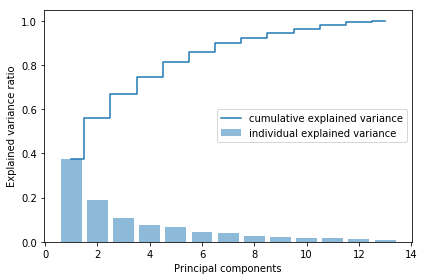

In [65]:
# 使用NumPy的cumsum函数，计算累计方差。
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# 通过Plo的step绘制
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [66]:
# 按特征值的降序排列特征对
# 列出(特征值，特征向量)元组。
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
 
# 从高到低排序(特征值，特征向量)元组。
eigen_pairs.sort(reverse=True)
# 本案例只选择前60%的两个特征向量
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


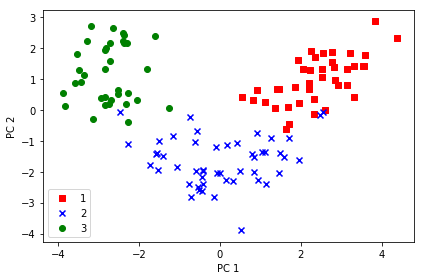

In [67]:
# 通过计算矩阵点积，将整个训练集转换到包含两个主成分的子空间上。
X_train_pca = X_train_std.dot(w)
 
# 可视化
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
 
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

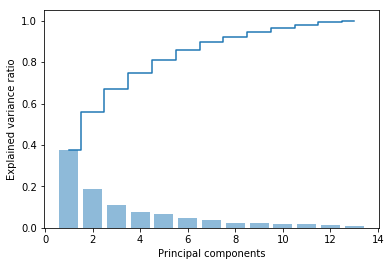

In [68]:
# 使用Scikit-learn进行主成分分析
from sklearn.decomposition import PCA
 
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
# pca.explained_variance_ratio_
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

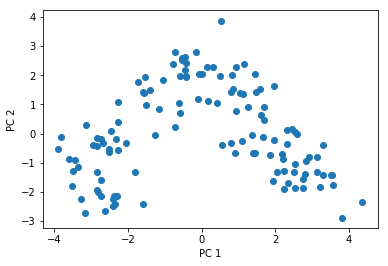

In [69]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

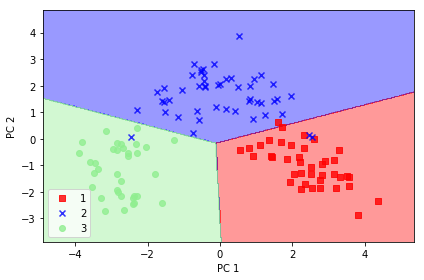

In [70]:
# 使用plot_decision_regions函数进行可视化决策区域
from matplotlib.colors import ListedColormap
 
def plot_decision_regions(X, y, classifier, resolution=0.02):
 
    #设置标记生成器和颜色映射。
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 
    # plot 决定表面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
 
    # plot 类样本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
 
# 使用前两个主要组件训练逻辑回归分类器
from sklearn.linear_model import LogisticRegression
 
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca3.png', dpi=300)
plt.show()


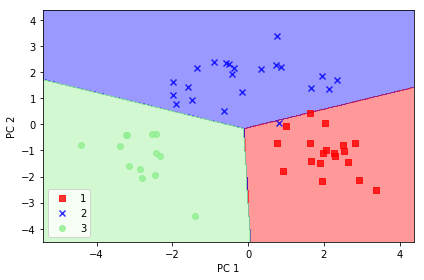

In [71]:
# 绘制逻辑回归在转换后的测试数据上得到的决策区域
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca4.png', dpi=300)
plt.show()

In [73]:
#  获取相应的方差贡献率
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])